In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import joblib

In [2]:
# Load the dataset
data = pd.read_csv('Crop_recommendation_Dataset.csv')

In [3]:
# Standardize the data
scaler = StandardScaler()
features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

In [4]:
# Initialize the PCA object
pca = PCA(n_components=2)
# Fit the PCA object to the data
pca_result = pca.fit_transform(features)

In [5]:
# Cluster the data
kmeans = KMeans(n_clusters=20)
kmeans.fit(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
kmeans.fit(pca_result)

c:\Users\VIRAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VIRAT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20)

In [6]:
# Analyze the clusters
cluster_labels = kmeans.labels_

In [7]:
# Define the number of clusters
num_clusters = 20

# Initialize lists to store cluster statistics
cluster_means = []
cluster_stds = []

for cluster_id in range(num_clusters):
    # Select the data points in the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Calculate the mean and standard deviation for each feature in the current cluster
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_std = np.std(cluster_data, axis=0)

    # Append the results to the lists
    cluster_means.append(cluster_mean)
    cluster_stds.append(cluster_std)


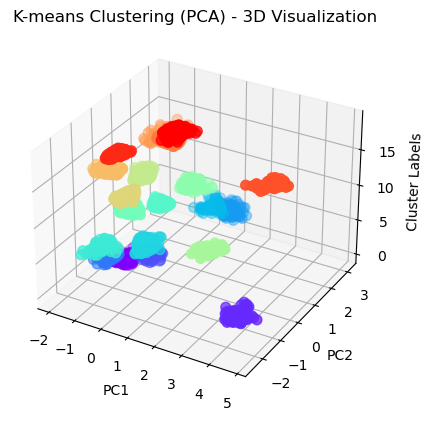

In [8]:
# Create a 3D scatter plot of the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], cluster_labels, c=cluster_labels, s=50, cmap='rainbow')

# Set the axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Cluster Labels')

# Set the title of the plot
ax.set_title('K-means Clustering (PCA) - 3D Visualization')

# Show the plot
plt.show()

In [9]:
# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(data, x='N', y='P', z='K', color='label', text='label')

# Set the axis labels
fig.update_layout(scene=dict(xaxis_title='N', yaxis_title='P', zaxis_title='K'))

# Set the title of the plot
fig.update_layout(title='K-means Clustering (PCA) - 3D Visualization')

# Show the interactive plot
fig.show()


In [10]:
# Replace 'your_model.pkl' with the file path where you want to save the model
model_filename = 'CR_PCR_7E.pkl'

# Save the K-means model
joblib.dump(kmeans, model_filename)

print(f"Model saved as {model_filename}")

Model saved as CR_PCR_7E.pkl
